In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/files/Real estate.csv')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

In [ ]:
df.drop(columns="No",inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#rename columns
df.columns=['transaction','house_age','distance_near_mrt','no_conv_stores','latitude','longitude','price_per_unit']
df.columns

Index(['transaction', 'house_age', 'distance_near_mrt', 'no_conv_stores',
       'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction        414 non-null    float64
 1   house_age          414 non-null    float64
 2   distance_near_mrt  414 non-null    float64
 3   no_conv_stores     414 non-null    int64  
 4   latitude           414 non-null    float64
 5   longitude          414 non-null    float64
 6   price_per_unit     414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
#check for null values
df.isnull().sum()

transaction          0
house_age            0
distance_near_mrt    0
no_conv_stores       0
latitude             0
longitude            0
price_per_unit       0
dtype: int64

In [ ]:
#describe
df.describe()

,transaction,house_age,distance_near_mrt,no_conv_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
numerical_cols = []
categorical_cols = []

def get_numerical_and_categorical_columns(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)

get_numerical_and_categorical_columns(df)


In [ ]:
print('numerical_col :',numerical_cols)
print('categorical_col :',categorical_cols)


numerical_col : ['transaction', 'house_age', 'distance_near_mrt', 'no_conv_stores', 'latitude', 'longitude', 'price_per_unit']
categorical_col : []


{'whiskers': [<matplotlib.lines.Line2D at 0x7d37f8c54850>,
 'caps': [<matplotlib.lines.Line2D at 0x7d37f8c554b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d37f8c57a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7d37f90b4280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d37fb5fcf10>],
 'means': []}

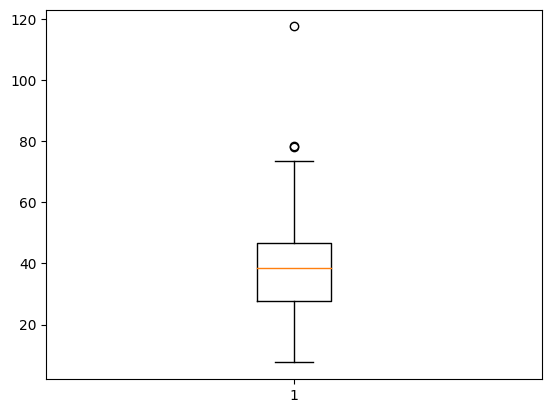

In [ ]:
plt.boxplot(df['price_per_unit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d37f921dde0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d37f921d840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d37f921ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d37f921d450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d37f921c3d0>],
 'means': []}

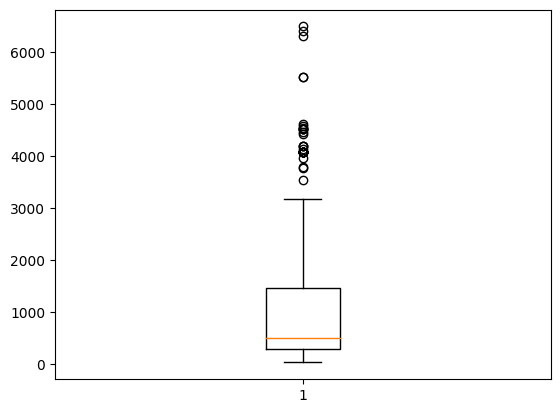

In [ ]:
plt.boxplot(df['distance_near_mrt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d37f88c1690>,
 'caps': [<matplotlib.lines.Line2D at 0x7d37f88c1390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d37f88c1ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d37f88c2470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d37f88c01f0>],
 'means': []}

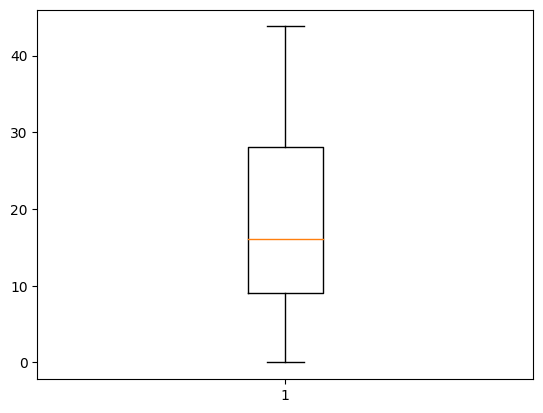

In [ ]:
plt.boxplot(df['house_age'])

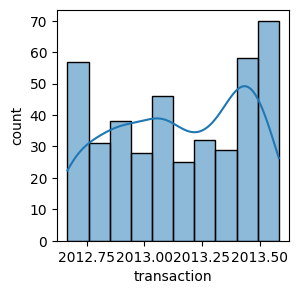

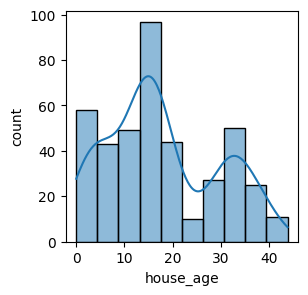

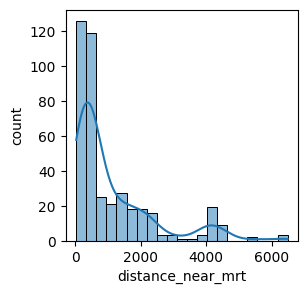

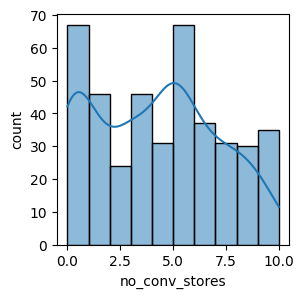

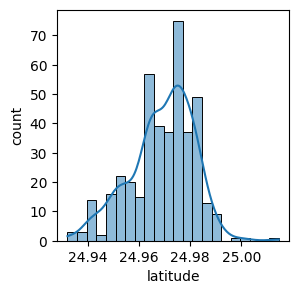

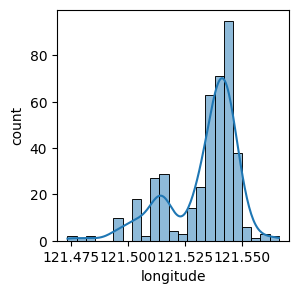

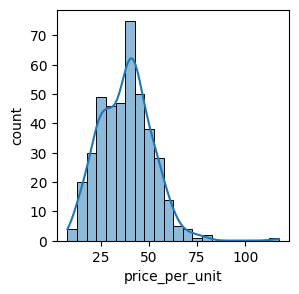

In [ ]:
#histogram analysis
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    plt.figure(figsize = (3,3))
    sns.histplot(df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

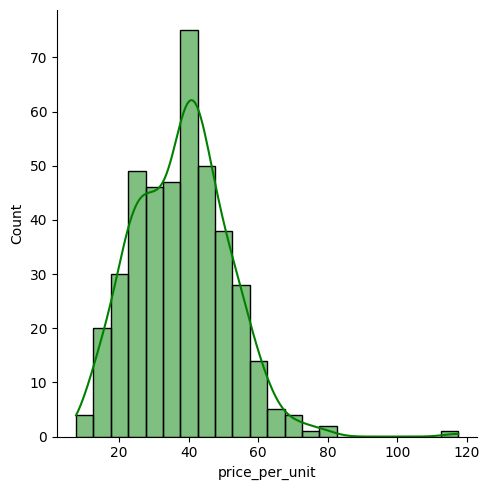

In [ ]:
sns.displot(data=df, x='price_per_unit', kde=True , color='g')


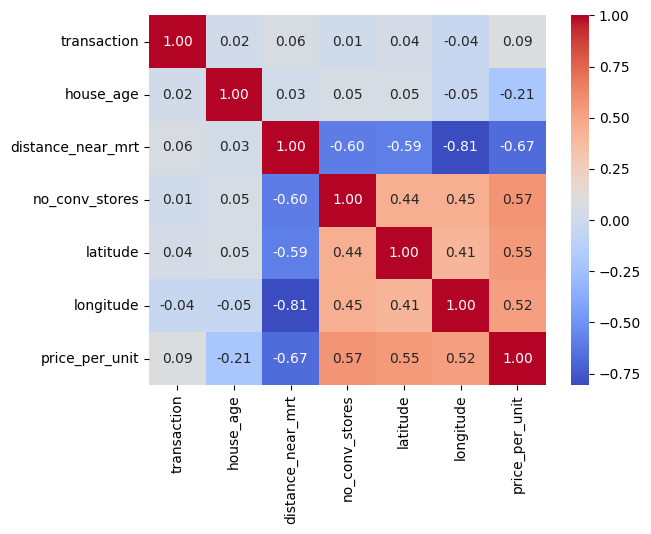

In [ ]:
# plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm", fmt=".2f")
plt.show()

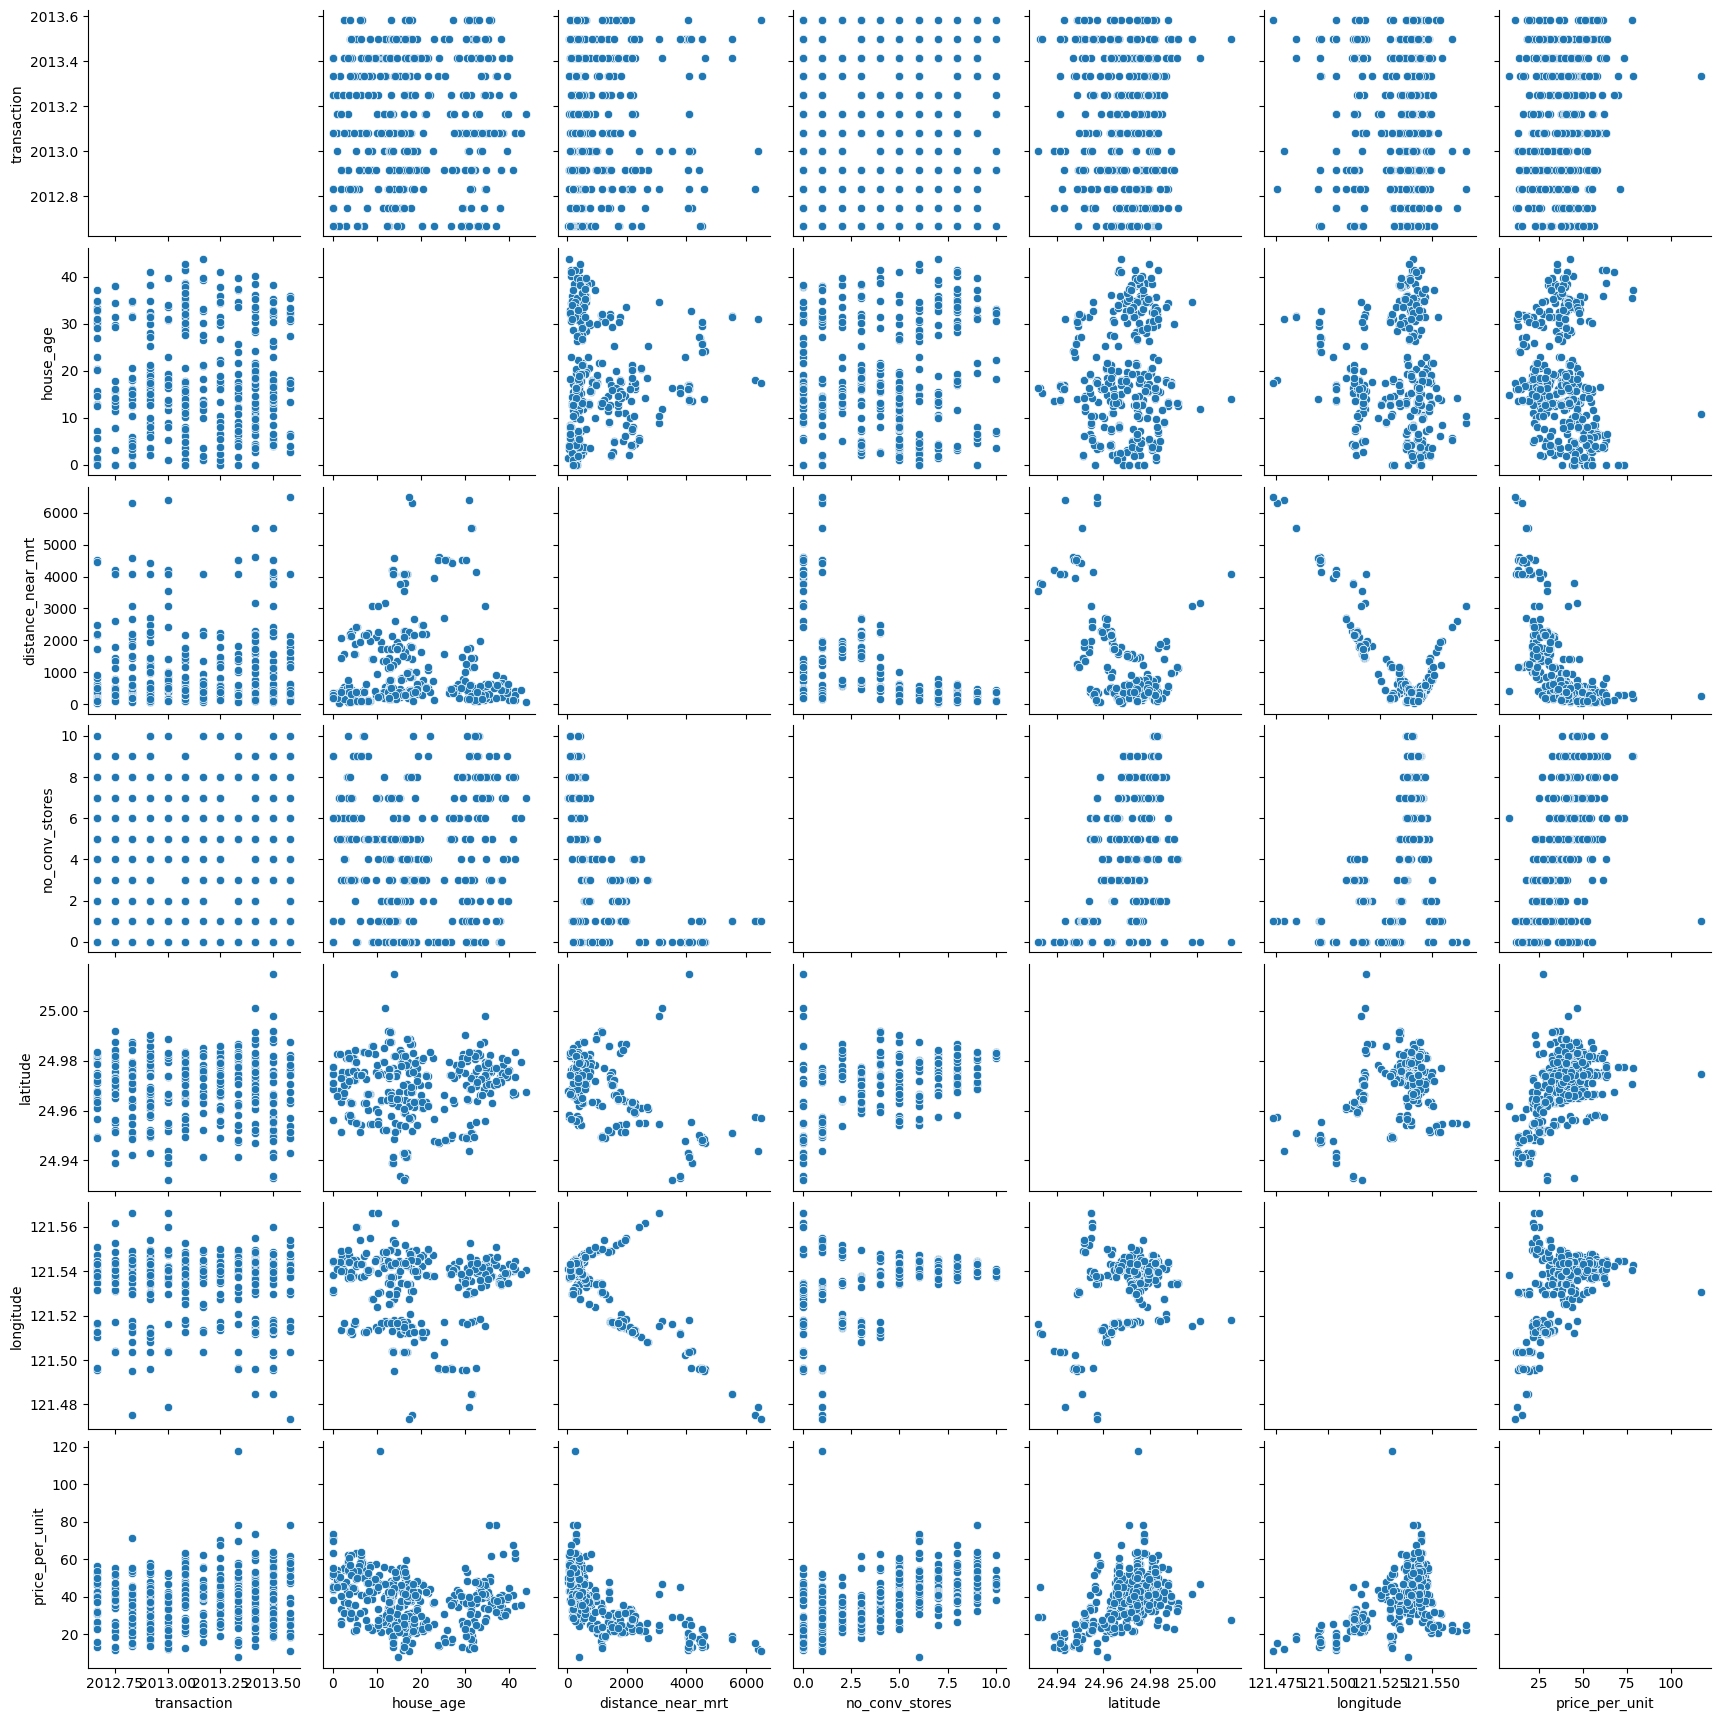

In [ ]:
sns.pairplot(df,diag_kind='scatter')

In [ ]:
##independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

,transaction,house_age,distance_near_mrt,no_conv_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price_per_unit, dtype: float64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X.columns

Index(['transaction', 'house_age', 'distance_near_mrt', 'no_conv_stores',
       'latitude', 'longitude'],
      dtype='object')

<Axes: xlabel='transaction', ylabel='price_per_unit'>

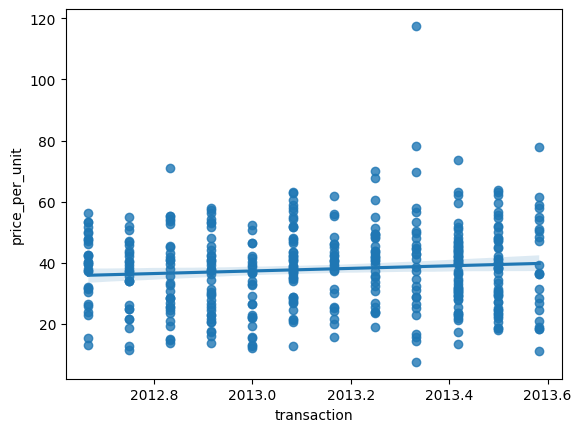

In [ ]:
#view regresion plots
sns.regplot(x=df['transaction'],y=df['price_per_unit'])

<Axes: xlabel='distance_near_mrt', ylabel='price_per_unit'>

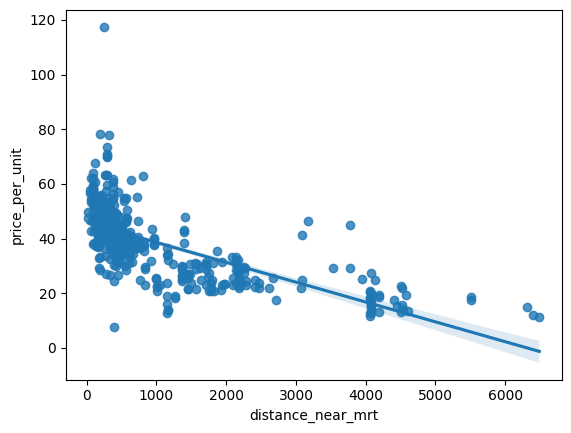

In [ ]:
sns.regplot(x=df['distance_near_mrt'],y=df['price_per_unit'])

<Axes: xlabel='house_age', ylabel='price_per_unit'>

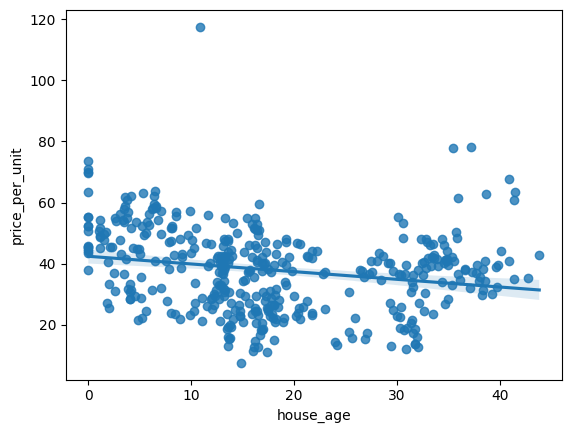

In [ ]:
sns.regplot(x=df['house_age'],y=df['price_per_unit'])

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
len(X_train),len(y_train)

(310, 310)

In [ ]:
#linear regression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([49.97698146, 43.22696643, 45.91857778, 41.83585703, 29.72725675,
       47.97652776, 46.57545722, 48.51827039, 25.43643267, 57.0005958 ,
       36.72018088, 39.141004  , 39.55016999, 25.04996661, 37.56311357,
       36.81345193, 46.10376835, 47.42738552, 32.53207904, 46.33271522,
        3.99210401, 37.57807849, 50.31832897, 47.88673957, 13.87564125,
       41.2859542 , 15.04967374, 44.40086624, 37.0956962 , 39.43756049,
       16.16189434, 42.50916333, 37.26377699, 29.41529043, 48.67083147,
       33.058032  , 53.141229  , 16.49329766, 52.12829468, 42.63864307,
       40.47765704, 42.76591294, 49.60451376, 39.34705064, 41.76177396,
       48.95841714, 45.99045057, 22.38413383, 49.27102496, 47.84466578,
       50.48086169, 51.05003148, 45.01190804, 45.03293236, 38.08855642,
       17.48086943, 39.12938952, 36.42051857, 30.65623862, 48.01439016,
       35.56224317, 34.49053204, 17.48086943, 11.31887759, 13.94760779,
       36.59050672, 30.09911591, 49.31926867, 34.92782128, 33.33

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

74.56473416687724
6.439454795578511
8.635087386174922


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5299118154091751
0.5008341957437632


polynomial regression

In [ ]:
polynomial_converter= PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit_transform(X)
poly_features.shape

(414, 27)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.594154,2.605846
347,11.2,5.042898,6.157102
307,24.7,19.515308,5.184692
299,46.1,47.185175,-1.085175
391,31.3,29.850684,1.449316


In [ ]:
Poly_MAE = metrics.mean_absolute_error(y_test,y_pred)
Poly_MSE = metrics.mean_squared_error(y_test,y_pred)
Poly_RMSE = np.sqrt(Poly_MSE)

In [ ]:
print(Poly_MAE,Poly_MSE,Poly_RMSE)

4.3042348123073575 29.018482189573753 5.386880562029731


In [ ]:
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7807879609332848
0.7197701768631682
